In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv('trainReg.csv')

In [11]:
print(data.shape)
print(data.info())
print(data.describe())
print(data.columns)
data.head(5)

(77779, 92)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77779 entries, 0 to 77778
Data columns (total 92 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      77779 non-null  int64  
 1   Y       77779 non-null  int64  
 2   V1      77779 non-null  float64
 3   V2      77779 non-null  float64
 4   V3      77779 non-null  int64  
 5   V4      77779 non-null  float64
 6   V5      77779 non-null  float64
 7   V6      77779 non-null  float64
 8   V7      77779 non-null  float64
 9   V8      77779 non-null  float64
 10  V9      77779 non-null  float64
 11  V10     77779 non-null  float64
 12  V11     77779 non-null  float64
 13  V12     77779 non-null  float64
 14  V13     77779 non-null  float64
 15  V14     77779 non-null  float64
 16  V15     77779 non-null  float64
 17  V16     77779 non-null  float64
 18  V17     77779 non-null  float64
 19  V18     77779 non-null  float64
 20  V19     77779 non-null  float64
 21  V20     77779 non-null 

,ID,Y,V1,V2,V3,V4,V5,V6,V7,V8,...,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90
0,1,2013,44.81144,0.83826,0,7.91314,10.94148,-0.04547,-15.16332,-10.47324,...,-8.44873,-230.30484,-40.94698,48.20025,-0.28694,155.76251,-56.23579,13.62599,123.92018,10.02845
1,2,1998,41.99180,7.99976,0,64.26707,16.54115,-9.28737,-40.73524,33.60440,...,18.68972,-44.06062,52.37792,81.36093,-14.81111,151.66273,-120.61213,10.57519,-3.21078,-1.07438
2,3,1998,42.19196,2.23111,0,65.07719,24.99746,1.76100,6.66573,3.45778,...,-3.69878,-118.95712,54.15529,-23.32168,-9.65067,-83.83055,-141.17594,7.33084,-275.69714,2.35522
3,4,1998,39.28634,-1.85716,0,91.04190,9.08333,0.08502,-5.59216,65.62463,...,20.89044,-18.53135,176.09769,351.33669,3.44682,121.69156,-270.43989,12.51659,-140.88884,-0.23476
4,5,1998,40.36025,2.94918,0,53.83723,13.71369,-8.21964,-40.21636,21.22366,...,19.91979,34.59026,-69.83720,102.31946,8.08807,135.08089,-153.02327,4.09207,-68.33046,-6.19159


In [4]:
print(data.columns)

Index(['ID', 'Y', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30',
       'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40',
       'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50',
       'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60',
       'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70',
       'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80',
       'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90'],
      dtype='object')


c:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


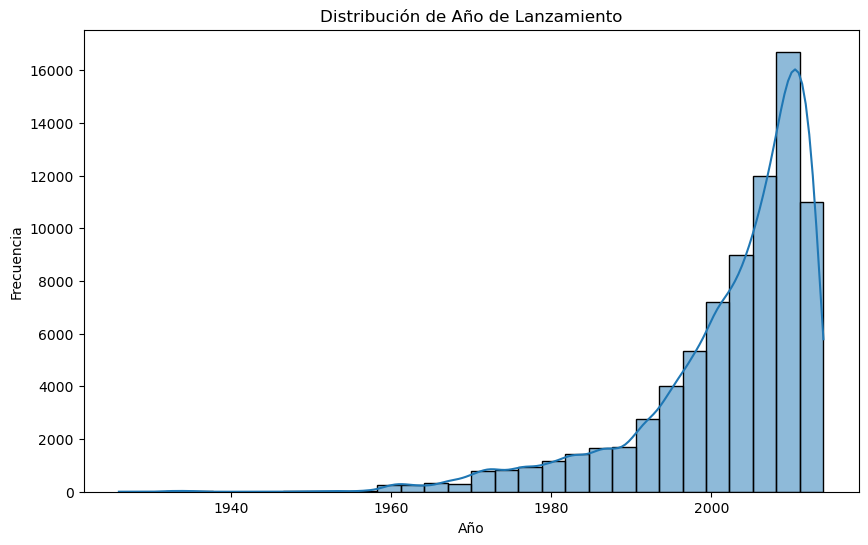

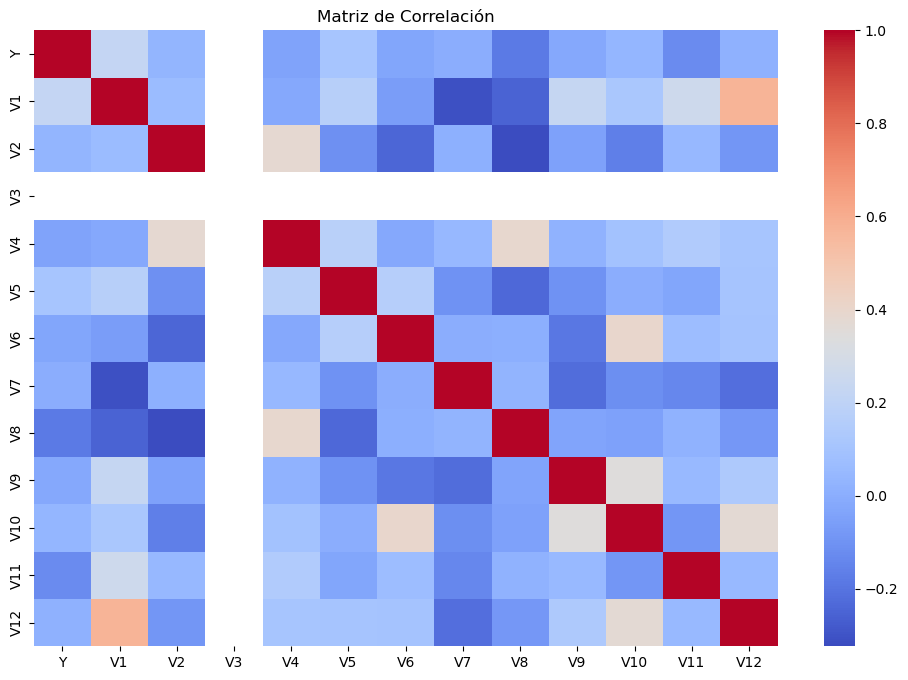

In [5]:
datos_principales = data[['Y', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10','V11', 'V12']]

# Visualizar la distribución de la variable objetivo (Año)
plt.figure(figsize=(10, 6))
sns.histplot(datos_principales['Y'], bins=30, kde=True)
plt.title('Distribución de Año de Lanzamiento')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.show()

# Visualizar la correlación entre las características
plt.figure(figsize=(12, 8))
sns.heatmap(datos_principales.corr(), cmap='coolwarm', annot=False)
plt.title('Matriz de Correlación')
plt.show()

# Visualizar la relación entre algunas características y el año de lanzamiento
#sns.pairplot(data[['Y', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10','V11', 'V12']], diag_kind='kde')
#plt.show()

In [13]:
# Dividir los datos en características (X) y etiquetas (Y)
X = data.drop(['ID', 'Y'], axis=1).values
Y = data['Y'].values

# Escalar las características para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# Construir el modelo de red neuronal
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_split=0.1)

# Evaluar el modelo en el conjunto de prueba
loss = model.evaluate(X_test, Y_test)
print("Loss en el conjunto de prueba:", loss)


Epoch 1/50
1750/1750 [==============================] - 3s 2ms/step - loss: 474947.9375 - val_loss: 61873.3398
Epoch 2/50
1750/1750 [==============================] - 3s 1ms/step - loss: 115260.1484 - val_loss: 17284.9941
Epoch 3/50
1750/1750 [==============================] - 3s 2ms/step - loss: 92500.3516 - val_loss: 11113.0000
Epoch 4/50
1750/1750 [==============================] - 3s 1ms/step - loss: 87120.7656 - val_loss: 4752.4790
Epoch 5/50
1750/1750 [==============================] - 3s 2ms/step - loss: 84008.7344 - val_loss: 5258.8325
Epoch 6/50
1750/1750 [==============================] - 3s 1ms/step - loss: 82016.4922 - val_loss: 4068.7717
Epoch 7/50
1750/1750 [==============================] - 3s 2ms/step - loss: 80321.0859 - val_loss: 5965.4507
Epoch 8/50
1750/1750 [==============================] - 3s 2ms/step - loss: 80142.5703 - val_loss: 4909.0835
Epoch 9/50
1750/1750 [==============================] - 3s 2ms/step - loss: 79053.8516 - val_loss: 3004.7070
Epoch 10/50
17

In [22]:
# Red 2 


from tensorflow.keras.callbacks import ReduceLROnPlateau

# Definir el modelo
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

# Compilar el modelo
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Añadir reducción de la tasa de aprendizaje en meseta
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Entrenar el modelo
history = model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_split=0.1, callbacks=[reduce_lr])

# Realizar predicciones en el conjunto de datos de prueba
predictions = model.predict(X_test).flatten()



Epoch 1/50
1750/1750 [==============================] - 3s 1ms/step - loss: 600785.5000 - val_loss: 97696.8828 - lr: 0.0010
Epoch 2/50
1750/1750 [==============================] - 2s 1ms/step - loss: 90038.8672 - val_loss: 27436.4336 - lr: 0.0010
Epoch 3/50
1750/1750 [==============================] - 2s 1ms/step - loss: 48270.4648 - val_loss: 9375.0361 - lr: 0.0010
Epoch 4/50
1750/1750 [==============================] - 3s 2ms/step - loss: 36954.2852 - val_loss: 4171.8398 - lr: 0.0010
Epoch 5/50
1750/1750 [==============================] - 3s 1ms/step - loss: 33534.0664 - val_loss: 2560.3477 - lr: 0.0010
Epoch 6/50
1750/1750 [==============================] - 2s 1ms/step - loss: 32160.3809 - val_loss: 2661.2498 - lr: 0.0010
Epoch 7/50
1750/1750 [==============================] - 3s 1ms/step - loss: 30772.3809 - val_loss: 1690.9557 - lr: 0.0010
Epoch 8/50
1750/1750 [==============================] - 2s 1ms/step - loss: 30793.3770 - val_loss: 1519.0140 - lr: 0.0010
Epoch 9/50
1750/1750 

NameError: name 'mean_squared_error' is not defined

In [24]:
# Calcular el RMSE en el conjunto de datos de prueba
rmse = np.sqrt(mean_squared_error(Y_test, predictions))
print("RMSE en el conjunto de prueba:", rmse)

RMSE en el conjunto de prueba: 19.951228276989834


In [35]:
# Red Neuronal 3


''' 
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))


Es te resultado unicamente escalando
{'loss': 113.59896850585938, 'root_mean_squared_error': 10.658281326293945}
'''
# Build the model




# Definir la arquitectura de la red neuronal
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))


# Compile the model
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

# Train the model
model.fit(X_train, Y_train, epochs=100, batch_size=64, validation_split=0.2)


# Evaluate the model
model.evaluate(X_test, Y_test, return_dict=True)


Epoch 1/100
778/778 [==============================] - 2s 2ms/step - loss: 1118700.8750 - root_mean_squared_error: 1057.6865 - val_loss: 247950.2812 - val_root_mean_squared_error: 497.9461
Epoch 2/100
778/778 [==============================] - 2s 2ms/step - loss: 179927.5938 - root_mean_squared_error: 424.1787 - val_loss: 122805.6719 - val_root_mean_squared_error: 350.4364
Epoch 3/100
778/778 [==============================] - 1s 2ms/step - loss: 97720.4219 - root_mean_squared_error: 312.6027 - val_loss: 65685.0156 - val_root_mean_squared_error: 256.2909
Epoch 4/100
778/778 [==============================] - 2s 2ms/step - loss: 55538.1719 - root_mean_squared_error: 235.6654 - val_loss: 32725.0547 - val_root_mean_squared_error: 180.9007
Epoch 5/100
778/778 [==============================] - 2s 2ms/step - loss: 31415.9238 - root_mean_squared_error: 177.2454 - val_loss: 15287.2031 - val_root_mean_squared_error: 123.6414
Epoch 6/100
778/778 [==============================] - 2s 2ms/step - 

{'loss': 136.45065307617188, 'root_mean_squared_error': 11.681209564208984}

In [68]:
# Aplicar PCA para reducir la dimensionalidad
pca = PCA(n_components=30)  # Elegir el número de componentes principales deseado
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Definir la arquitectura de la red neuronal
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_pca.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))


# Compile the model
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.01), metrics=[RootMeanSquaredError()])

# Train the model
model.fit(X_train_pca, Y_train, epochs=100, batch_size=64, validation_split=0.2)


# Evaluate the model
model.evaluate(X_test_pca, Y_test, return_dict=True)


ValueError: n_components=30 must be between 0 and min(n_samples, n_features)=12 with svd_solver='full'

In [71]:
columnas_predictoras= ['ID', 'Y','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10','V11', 'V12']

data_2 = data [columnas_predictoras]


# Dividir los datos en características (X) y etiquetas (Y)
X = data_2.drop(['ID', 'Y'], axis=1).values
Y = data_2['Y'].values

# Escalar las características para mejorar el rendimiento del modelo
#scaler = StandardScaler()
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)


# Definir la arquitectura de la red neuronal
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1,activation='linear'))


# Compile the models
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.01), metrics=[RootMeanSquaredError()])

# Train the model
model.fit(X_train, Y_train, epochs=100, batch_size=64, validation_split=0.2)


# Evaluate the model
model.evaluate(X_test, Y_test, return_dict=True)


Epoch 1/100
778/778 [==============================] - 2s 2ms/step - loss: 75093.5625 - root_mean_squared_error: 274.0320 - val_loss: 1068.4614 - val_root_mean_squared_error: 32.6873
Epoch 2/100
778/778 [==============================] - 1s 2ms/step - loss: 719.0242 - root_mean_squared_error: 26.8146 - val_loss: 410.9521 - val_root_mean_squared_error: 20.2720
Epoch 3/100
778/778 [==============================] - 2s 2ms/step - loss: 424.0192 - root_mean_squared_error: 20.5917 - val_loss: 274.3079 - val_root_mean_squared_error: 16.5622
Epoch 4/100
778/778 [==============================] - 2s 2ms/step - loss: 341.8751 - root_mean_squared_error: 18.4899 - val_loss: 215.2811 - val_root_mean_squared_error: 14.6725
Epoch 5/100
778/778 [==============================] - 2s 2ms/step - loss: 329.7806 - root_mean_squared_error: 18.1599 - val_loss: 494.1411 - val_root_mean_squared_error: 22.2293
Epoch 6/100
778/778 [==============================] - 2s 2ms/step - loss: 381.3821 - root_mean_squar

{'loss': 148.72802734375, 'root_mean_squared_error': 12.195409774780273}

In [66]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1

# Dividir los datos en características (X) y etiquetas (Y)
X = data.drop(['ID', 'Y'], axis=1)
Y = data['Y']

# Estandarizar las características
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)


# Definir el modelo de red neuronal con regularización L1 (Lasso)
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l1(0.001)),
    Dense(64, activation='relu', kernel_regularizer=l1(0.001)),
    Dense(1, activation='linear')
])


# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo con early stopping para evitar sobreajuste
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.fit(X_train, Y_train, validation_split=0.1, epochs=100, batch_size=32, callbacks=[early_stopping])

# Realizar predicciones en el conjunto de datos de prueba
predictions = model.predict(X_test).flatten()

# Calcular el RMSE en el conjunto de datos de prueba
rmse = np.sqrt(mean_squared_error(Y_test, predictions))
print("RMSE en el conjunto de prueba con características seleccionadas por red neuronal:", rmse)

Epoch 1/100
1750/1750 [==============================] - 3s 1ms/step - loss: 298958.0312 - val_loss: 354.1000
Epoch 2/100
1750/1750 [==============================] - 2s 1ms/step - loss: 314.5061 - val_loss: 267.6972
Epoch 3/100
1750/1750 [==============================] - 2s 1ms/step - loss: 255.3907 - val_loss: 236.2348
Epoch 4/100
1750/1750 [==============================] - 2s 1ms/step - loss: 229.1446 - val_loss: 203.7117
Epoch 5/100
1750/1750 [==============================] - 2s 1ms/step - loss: 218.7951 - val_loss: 196.7157
Epoch 6/100
1750/1750 [==============================] - 2s 1ms/step - loss: 211.7582 - val_loss: 226.6539
Epoch 7/100
1750/1750 [==============================] - 3s 2ms/step - loss: 200.1850 - val_loss: 180.8801
Epoch 8/100
1750/1750 [==============================] - 2s 1ms/step - loss: 192.9982 - val_loss: 177.1471
Epoch 9/100
1750/1750 [==============================] - 2s 1ms/step - loss: 188.5015 - val_loss: 201.1738
Epoch 10/100
1750/1750 [==========

In [60]:
# Cargue datos Test
test_data = pd.read_csv('testReg.csv')
test_data.columns

Index(['ID', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30',
       'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40',
       'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50',
       'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60',
       'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70',
       'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80',
       'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90'],
      dtype='object')

In [32]:
# Para Cargue Kaggle 

# Preprocesar los datos de prueba (escalar las características)
X_test_scaled = scaler.transform(test_data.drop('ID', axis=1).values)

# Realizar predicciones en el conjunto de datos de prueba
predictions = model.predict(X_test_scaled).flatten()

# Redondear las predicciones a números enteros
rounded_predictions = np.round(predictions).astype(int)

# Crear un DataFrame con las columnas 'ID' y 'Y' utilizando las predicciones redondeadas
submission_df = pd.DataFrame({'ID': test_data['ID'], 'Y': rounded_predictions})

# Guardar el DataFrame en un archivo CSV
submission_df.to_csv("submission.csv", index=False)

584/584 [==============================] - 1s 1ms/step


In [62]:
columnas_predictoras_cargue= ['ID','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10','V11', 'V12']

data_2_cargue = test_data[columnas_predictoras_cargue]

# Para Cargue Kaggle 

# Preprocesar los datos de prueba (escalar las características)
X_test_scaled = scaler.transform(data_2_cargue.drop('ID', axis=1).values)

# Realizar predicciones en el conjunto de datos de prueba
predictions = model.predict(X_test_scaled).flatten()

# Redondear las predicciones a números enteros
#rounded_predictions = np.round(predictions).astype(int)

# Crear un DataFrame con las columnas 'ID' y 'Y' utilizando las predicciones redondeadas
submission_df = pd.DataFrame({'ID': test_data['ID'], 'Y': predictions})

# Guardar el DataFrame en un archivo CSV
submission_df.to_csv("submission.csv", index=False)

584/584 [==============================] - 1s 1ms/step


In [15]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
from sklearn.feature_selection import SelectFromModel
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError

# Seleccionar las columnas predictoras
columnas_predictoras = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
                        'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
                        'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30',
                        'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40',
                        'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50',
                        'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60',
                        'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70',
                        'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80',
                        'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90']

# Obtener los datos de las columnas predictoras
X = data[columnas_predictoras].values
Y = data['Y'].values

# Escalar las características para mejorar el rendimiento del modelo
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# Entrenar el modelo de XGBoost para evaluar la importancia de las características
xgb_model = XGBRegressor()
xgb_model.fit(X_train, Y_train)

# Seleccionar las características más importantes utilizando XGBoost
selector = SelectFromModel(xgb_model, prefit=True)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Definir la arquitectura de la red neuronal
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_selected.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Compilar el modelo
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])


# Entrenar el modelo con Early Stopping
history = model.fit(X_train_selected, Y_train, epochs=1000, batch_size=64, validation_split=0.2, callbacks=[early_stopping])


# Evaluar el modelo
model.evaluate(X_test_selected, Y_test, return_dict=True)


Epoch 1/1000
778/778 [==============================] - 2s 2ms/step - loss: 527910.8750 - root_mean_squared_error: 726.5748 - val_loss: 1466.0948 - val_root_mean_squared_error: 38.2896
Epoch 2/1000
778/778 [==============================] - 2s 2ms/step - loss: 949.1845 - root_mean_squared_error: 30.8088 - val_loss: 639.2573 - val_root_mean_squared_error: 25.2835
Epoch 3/1000
778/778 [==============================] - 1s 2ms/step - loss: 567.7411 - root_mean_squared_error: 23.8273 - val_loss: 497.2438 - val_root_mean_squared_error: 22.2990
Epoch 4/1000
778/778 [==============================] - 1s 2ms/step - loss: 488.8208 - root_mean_squared_error: 22.1093 - val_loss: 448.8206 - val_root_mean_squared_error: 21.1854
Epoch 5/1000
778/778 [==============================] - 2s 2ms/step - loss: 449.7389 - root_mean_squared_error: 21.2070 - val_loss: 417.7453 - val_root_mean_squared_error: 20.4388
Epoch 6/1000
778/778 [==============================] - 1s 2ms/step - loss: 420.9922 - root_mea

{'loss': 86.60543823242188, 'root_mean_squared_error': 9.306203842163086}

In [11]:
X_train_xgb.shape[1]

1

In [8]:
# 2024/04/23


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K

# Definir RMSE como métrica personalizada
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))



# Dividir los datos en características (X) y variable dependiente (y)
X = data.drop(['ID', 'Y'], axis=1).values
y = data['Y'].values

# Normalizar las características
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))


# Compilar el modelo con RMSE como métrica
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[rmse])

# Entrenar el modelo
model.fit(X_train, y_train, batch_size=32, epochs=50, validation_split=0.1)

# Evaluar el modelo en el conjunto de prueba
loss, rmse_score = model.evaluate(X_test, y_test)
print("Loss en el conjunto de prueba:", loss)
print("RMSE en el conjunto de prueba:", rmse_score)

# Hacer predicciones
predictions = model.predict(X_test)

# Imprimir algunas predicciones y valores reales para comparar
for i in range(10):
    print("Predicción:", predictions[i][0], "Año real:", y_test[i])


Epoch 1/50
1750/1750 [==============================] - 3s 2ms/step - loss: 574888.6875 - rmse: 617.5425 - val_loss: 102232.4219 - val_rmse: 311.4170
Epoch 2/50
1750/1750 [==============================] - 3s 2ms/step - loss: 56044.2734 - rmse: 224.1680 - val_loss: 24226.7539 - val_rmse: 149.0222
Epoch 3/50
1750/1750 [==============================] - 3s 2ms/step - loss: 12456.0879 - rmse: 102.7071 - val_loss: 5457.2217 - val_rmse: 67.0083
Epoch 4/50
1750/1750 [==============================] - 3s 2ms/step - loss: 2371.8823 - rmse: 43.6663 - val_loss: 1687.0258 - val_rmse: 34.5697
Epoch 5/50
1750/1750 [==============================] - 3s 1ms/step - loss: 714.8187 - rmse: 24.6455 - val_loss: 738.6257 - val_rmse: 23.7349
Epoch 6/50
1750/1750 [==============================] - 3s 2ms/step - loss: 439.2543 - rmse: 19.5539 - val_loss: 425.3615 - val_rmse: 17.8589
Epoch 7/50
1750/1750 [==============================] - 3s 2ms/step - loss: 433.9984 - rmse: 18.3314 - val_loss: 487.3541 - val_

### Selecciòn de caracteristicas por filtrado 

In [62]:

# Separar las características (X) y la variable objetivo (y)

data.dropna


X = data.drop(['ID', 'Y', 'V3'], axis=1)
y = data['Y']

# Calcular correlaciones entre características y variable objetivo
correlations = {col: X[col].corr(y) for col in X.columns}

# Seleccionar características con alta correlación (por ejemplo, |correlación| > 0.09)
selected_features = [col for col in correlations if abs(correlations[col]) > 0.1]

# Reducir el conjunto de datos a las características seleccionadas
X_filtered = X[selected_features]

print('caracteristicas: ', len(selected_features))

print('caracteristicas seleccionadas', selected_features)


# Usar X_filtered para entrenar el modelo de red neuronal

# Normalizar las características
scaler = MinMaxScaler()
X = scaler.fit_transform(X_filtered)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))


# Compilar el modelo con RMSE como métrica
model.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError(), metrics=[RootMeanSquaredError()])

# Entrenar el modelo
model.fit(X_train, y_train, batch_size=32, epochs=50, validation_split=0.2)

# Evaluate the model
model.evaluate(X_test, y_test, return_dict=True)

# Evaluar el modelo en el conjunto de prueba
loss, rmse_score = model.evaluate(X_test, y_test)
print("Loss en el conjunto de prueba:", loss)
print("RMSE en el conjunto de prueba:", rmse_score)


caracteristicas:  9
caracteristicas seleccionadas ['V1', 'V5', 'V8', 'V11', 'V36', 'V40', 'V46', 'V63', 'V69']
Epoch 1/50
1362/1362 [==============================] - 4s 2ms/step - loss: 1376249.5000 - root_mean_squared_error: 1173.1366 - val_loss: 3036.3254 - val_root_mean_squared_error: 55.1029
Epoch 2/50
1362/1362 [==============================] - 3s 3ms/step - loss: 3065.5710 - root_mean_squared_error: 55.3676 - val_loss: 2961.6406 - val_root_mean_squared_error: 54.4210
Epoch 3/50
1362/1362 [==============================] - 5s 4ms/step - loss: 2901.4858 - root_mean_squared_error: 53.8654 - val_loss: 2678.5120 - val_root_mean_squared_error: 51.7543
Epoch 4/50
1362/1362 [==============================] - 5s 4ms/step - loss: 2494.8618 - root_mean_squared_error: 49.9486 - val_loss: 2222.6509 - val_root_mean_squared_error: 47.1450
Epoch 5/50
1362/1362 [==============================] - 5s 4ms/step - loss: 2046.8860 - root_mean_squared_error: 45.2425 - val_loss: 1847.7590 - val_root_me

### Selecciòn de caracteristicas por envoltura 

In [76]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


# Separar las características (X) y la variable objetivo (y)
X = data.drop(['ID', 'Y', 'V3'], axis=1)
y = data['Y']

# Crear un modelo de regresión lineal
estimator = LinearRegression()

# Seleccionar características usando RFE con 10 características restantes
selector = RFE(estimator, n_features_to_select=10)

# Ajustar el selector a las características y la variable objetivo
selector.fit(X, y)

# Obtener las características seleccionadas
selected_features = X.columns[selector.support_]

# Reducir el conjunto de datos a las características seleccionadas
X_wrapped = X[selected_features]

# Usar X_wrapped para entrenar el modelo de red neuronal
# Normalizar las características
scaler = MinMaxScaler()
X = scaler.fit_transform(X_wrapped)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))


# Compilar el modelo con RMSE como métrica
model.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError(), metrics=[RootMeanSquaredError()])

# Entrenar el modelo
model.fit(X_train, y_train, batch_size=32, epochs=50, validation_split=0.2)

# Evaluate the model
model.evaluate(X_test, y_test, return_dict=True)

# Evaluar el modelo en el conjunto de prueba
loss, rmse_score = model.evaluate(X_test, y_test)
print("Loss en el conjunto de prueba:", loss)
print("RMSE en el conjunto de prueba:", rmse_score)

Epoch 1/50
1362/1362 [==============================] - 7s 4ms/step - loss: 568191.1875 - root_mean_squared_error: 753.7845 - val_loss: 7175.7437 - val_root_mean_squared_error: 84.7098
Epoch 2/50
1362/1362 [==============================] - 6s 4ms/step - loss: 5828.3721 - root_mean_squared_error: 76.3438 - val_loss: 4610.8945 - val_root_mean_squared_error: 67.9036
Epoch 3/50
1362/1362 [==============================] - 6s 4ms/step - loss: 3530.6475 - root_mean_squared_error: 59.4193 - val_loss: 2710.2251 - val_root_mean_squared_error: 52.0598
Epoch 4/50
1362/1362 [==============================] - 6s 4ms/step - loss: 2211.1787 - root_mean_squared_error: 47.0232 - val_loss: 1750.2842 - val_root_mean_squared_error: 41.8364
Epoch 5/50
1362/1362 [==============================] - 6s 4ms/step - loss: 1502.1011 - root_mean_squared_error: 38.7570 - val_loss: 1213.5952 - val_root_mean_squared_error: 34.8367
Epoch 6/50
1362/1362 [==============================] - 6s 4ms/step - loss: 1054.9961 -

## Seleccion aleatoria envoltura

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from math import sqrt

# Crear una lista de modelos de estimación
estimators = [LinearRegression(), RandomForestRegressor(), SVR()]

# Crear una lista de números de características a seleccionar
features_to_select = [5, 10, 15, 20]

# Inicializar el mejor RMSE a un número alto
best_rmse = float('inf')

# Inicializar el mejor modelo y el número de características
best_estimator = None
best_n_features = None

for estimator in estimators:
    for n in features_to_select:
        # Seleccionar características usando RFE
        selector = RFE(estimator, n_features_to_select=n)
        selector = selector.fit(X, y)
        selected_features = X.columns[selector.support_]
        X_wrapped = X[selected_features]

        # Normalizar las características
        scaler = MinMaxScaler()
        X = scaler.fit_transform(X_wrapped)

        # Dividir los datos en conjuntos de entrenamiento y prueba
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # Entrenar el modelo
        model = Sequential()
        model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(1, activation='linear'))
        model.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError(), metrics=[RootMeanSquaredError()])
        model.fit(X_train, y_train, batch_size=32, epochs=50, validation_split=0.2)

        # Evaluar el modelo en el conjunto de prueba
        y_pred = model.predict(X_test)
        rmse = sqrt(mean_squared_error(y_test, y_pred))

        # Si el RMSE es menor que el mejor RMSE hasta ahora, actualizar el mejor RMSE, el mejor modelo y el número de características
        if rmse < best_rmse:
            best_rmse = rmse
            best_estimator = estimator
            best_n_features = n

print("Mejor RMSE:", best_rmse)
print("Mejor modelo de estimación:", best_estimator)
print("Mejor número de características:", best_n_features)


In [74]:
selected_features = X.columns[selector.support_]

selected_features

#X_wrapped = X[selected_features]

Index(['V1', 'V2', 'V4', 'V6', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13'], dtype='object')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from math import sqrt

# Cargar los datos
train_data = pd.read_csv('trainReg.csv')
test_data = pd.read_csv('testReg.csv')

# Preparar los datos de entrenamiento y prueba
X = train_data.drop(columns=['ID', 'Y'])
y = train_data['Y']
X_test = test_data.drop(columns=['ID'])

# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=0)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Elastic Net para seleccionar características
model_enet = ElasticNetCV(cv=5, random_state=0, l1_ratio=[.1, .5, .7, .9, .95, .99, 1], alphas=np.logspace(-4, -0.5, 30))
model_enet.fit(X_train_scaled, y_train)

# Importancia de las características y selección
importance = np.abs(model_enet.coef_)
selected_features = importance > np.sort(importance)[::-1][60]  # seleccionar las 60 características más importantes
X_train_selected = X_train_scaled[:, selected_features]
X_val_selected = X_val_scaled[:, selected_features]
X_test_selected = X_test_scaled[:, selected_features]

# Definición de la función para construir el modelo
def build_optimized_model(layers_info, dropout_rate):
    model = Sequential()
    for i, (neurons, use_bn) in enumerate(layers_info):
        if i == 0:
            model.add(Dense(neurons, activation='relu', input_shape=(X_train_selected.shape[1],)))
        else:
            model.add(Dense(neurons, activation='relu'))
        if use_bn:
            model.add(BatchNormalization())
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    return model

further_refined_configurations = [

    ([ (160, True), (80, True), (45, True), (25, True), (20, True) ], 0.0),
    ([ (160, True), (80, True), (45, True), (25, True), (15, True) ], 0.0),
    ([ (160, True), (80, True), (45, True), (25, True), (8, True) ], 0.0),
    ([ (160, True), (80, True), (45, True), (25, True), (10, True) ], 0.0),# Añadir una capa adicional
]

# Evaluar las configuraciones refinadas adicionales
further_refined_results = {}
for index, (layers_info, dropout_rate) in enumerate(further_refined_configurations):
    model = build_optimized_model(layers_info, dropout_rate)
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train_selected, y_train, validation_data=(X_val_selected, y_val), epochs=100, batch_size=10, callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])
    y_pred = model.predict(X_val_selected)
    rmse = sqrt(mean_squared_error(y_val, y_pred))
    further_refined_results[f'Further Refined Modelo {index+1}'] = rmse

# Determinar el mejor modelo de las variaciones adicionales
best_further_refined_model = min(further_refined_results, key=further_refined_results.get)
best_further_refined_rmse = further_refined_results[best_further_refined_model]

print("RMSEs de las variaciones adicionales refinadas de modelos optimizados:", further_refined_results)
print("La mejor variación adicional refinada de modelo es", best_further_refined_model, "con un RMSE de", best_further_refined_rmse)